<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Impute Missing Values**


Estimated time needed: **30** minutes


In this lab, you will practice essential data wrangling techniques using the Stack Overflow survey dataset. The primary focus is on handling missing data and ensuring data quality. You will:

- **Load the Data:** Import the dataset into a DataFrame using the pandas library.

- **Clean the Data:** Identify and remove duplicate entries to maintain data integrity.

- **Handle Missing Values:** Detect missing values, impute them with appropriate strategies, and verify the imputation to create a complete and reliable dataset for analysis.

This lab equips you with the skills to effectively preprocess and clean real-world datasets, a crucial step in any data analysis project.


## Objectives


In this lab, you will perform the following:


-   Identify missing values in the dataset.

-   Apply techniques to impute missing values in the dataset.
  
-   Use suitable techniques to normalize data in the dataset.


-----


#### Install needed library


In [1]:
!pip install pandas

### Step 1: Import Required Libraries


In [2]:
import pandas as pd

### Step 2: Load the Dataset Into a Dataframe


#### **Read Data**
<p>
The functions below will download the dataset into your browser:
</p>


In [3]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(file_path)

# Display the first few rows to ensure it loaded correctly
print(df.head())

   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

### Step 3. Finding and Removing Duplicates
##### Task 1: Identify duplicate rows in the dataset.


In [6]:
# Identify duplicate rows
duplicate_rows = df[df.duplicated()]

# Display duplicate rows
print(f"Number of duplicate rows: {len(duplicate_rows)}")
#print(f"\nDuplicate rows: {duplicate_rows}")

Number of duplicate rows: 0


##### Task 2: Remove the duplicate rows from the dataframe.



In [9]:
# Remove duplicate rows
df_no_duplicates = df.drop_duplicates()

# Verify that duplicates are removed
print(f"Number of rows after removing duplicates: {len(df_no_duplicates)}")
print('----------------------------------------------------------------------------------------------------')
print("\nFirst few rows after removing duplicates:")
print(df_no_duplicates.head())

Number of rows after removing duplicates: 65437
----------------------------------------------------------------------------------------------------

First few rows after removing duplicates:
   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;C

### Step 4: Finding Missing Values
##### Task 3: Find the missing values for all columns.


In [10]:
# Find missing values for all columns
missing_values = df.isnull().sum()

# Display columns with their respective count of missing values
print(f"Missing values for each column: {missing_values}")

Missing values for each column: ResponseId                 0
MainBranch                 0
Age                        0
Employment                 0
RemoteWork             10631
                       ...  
JobSatPoints_11        35992
SurveyLength            9255
SurveyEase              9199
ConvertedCompYearly    42002
JobSat                 36311
Length: 114, dtype: int64


##### Task 4: Find out how many rows are missing in the column RemoteWork.


In [11]:
# Count missing rows in the 'RemoteWork' column
missing_remotework_count = df["RemoteWork"].isnull().sum()

print(f"Number of missing rows in the 'RemoteWork' column: {missing_remotework_count}")

Number of missing rows in the 'RemoteWork' column: 10631


### Step 5. Imputing Missing Values
##### Task 5: Find the value counts for the column RemoteWork.


In [15]:
# Get value counts for the 'RemoteWork' column
remote_work_value_counts = df["RemoteWork"].value_counts()

print("Value counts for the 'RemoteWork' column:")
print(remote_work_value_counts)

Value counts for the 'RemoteWork' column:
RemoteWork
Hybrid (some remote, some in-person)    23015
Remote                                  20831
In-person                               10960
Name: count, dtype: int64


##### Task 6: Identify the most frequent (majority) value in the RemoteWork column.



In [16]:
# Find the most frequent value in the 'Employment' column
majority_value = df["RemoteWork"].mode()[0]

# Count occurrences of the majority value
majority_count = df["RemoteWork"].value_counts().max()

print(f"The most frequent value in the 'RemoteWork' column is: '{majority_value}' with {majority_count} occurrences.")

The most frequent value in the 'RemoteWork' column is: 'Hybrid (some remote, some in-person)' with 23015 occurrences.


##### Task 7: Impute (replace) all the empty rows in the column RemoteWork with the majority value.



In [17]:
# Find the most frequent value (mode) in the 'Employment' column
most_frequent_value = df["RemoteWork"].mode()[0]

# Impute missing values with the most frequent value
df["RemoteWork"] = df["RemoteWork"].fillna(most_frequent_value)

# Verify the imputation
print(f"Missing values in 'RemoteWork' column after imputation: {df['RemoteWork'].isnull().sum()}")

Missing values in 'RemoteWork' column after imputation: 0


##### Task 8: Check for any compensation-related columns and describe their distribution.



Descriptive statistics for compensation-related columns:
           CompTotal  ConvertedCompYearly
count   3.374000e+04         2.343500e+04
mean   2.963841e+145         8.615529e+04
std    5.444117e+147         1.867570e+05
min     0.000000e+00         1.000000e+00
25%     6.000000e+04         3.271200e+04
50%     1.100000e+05         6.500000e+04
75%     2.500000e+05         1.079715e+05
max    1.000000e+150         1.625660e+07


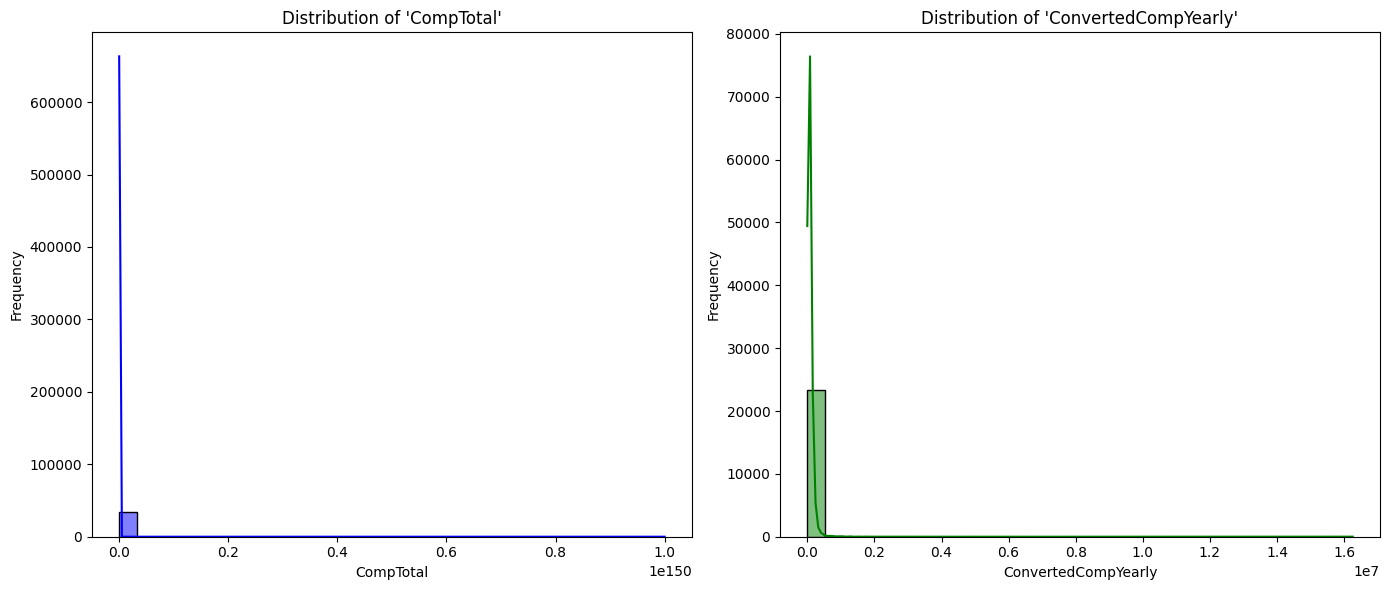

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check if 'CompTotal' and 'ConvertedCompYearly' exist in the dataset
compensation_columns = ['CompTotal', 'ConvertedCompYearly']
missing_columns = [col for col in compensation_columns if col not in df.columns]

if missing_columns:
    print(f"These compensation-related columns are missing from the dataset: {', '.join(missing_columns)}")
else:
    # Describe the distribution of compensation columns
    print("Descriptive statistics for compensation-related columns:")
    print(df[compensation_columns].describe())

    # Visualize the distribution of compensation columns
    plt.figure(figsize=(14, 6))

    # Plot histograms for both columns
    plt.subplot(1, 2, 1)
    sns.histplot(df['CompTotal'], kde=True, color='blue', bins=30)
    plt.title("Distribution of 'CompTotal'")
    plt.xlabel('CompTotal')
    plt.ylabel('Frequency')

    plt.subplot(1, 2, 2)
    sns.histplot(df['ConvertedCompYearly'], kde=True, color='green', bins=30)
    plt.title("Distribution of 'ConvertedCompYearly'")
    plt.xlabel('ConvertedCompYearly')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

### Summary 


**In this lab, you focused on imputing missing values in the dataset.**

- Use the <code>pandas.read_csv()</code> function to load a dataset from a CSV file into a DataFrame.

- Download the dataset if it's not available online and specify the correct file path.



<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-11-05|1.3|Madhusudhan Moole|Updated lab|
|2024-10-29|1.2|Madhusudhan Moole|Updated lab|
|2024-09-27|1.1|Madhusudhan Moole|Updated lab|
|2024-09-26|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
